In [33]:
from keras import models
from keras import layers
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os, shutil
import re
import itertools
import cv2
import pandas as pd
from ipywidgets import widgets,interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output, Markdown
from keras.utils import vis_utils
import graphviz

Load weight from checkpoint

In [18]:
def plot_model(model_history): 
    """summary of model accuracy and loss"""
    history=model_history.history
    """plot model accuracy"""
    plt.figure()
    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['accuracy', 'val accuracy'])
    plt.show()
    """plot model loss """
    plt.figure()
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.legend(['loss', 'val loss'])
    plt.show()
def model_scores(mod): 
    test_score=mod.evaluate_generator(test_generator)
    train_score=mod.evaluate_generator(train_generator)
    val_score=mod.evaluate_generator(val_generator)
    print('train score:', train_score)
    print('test score:', test_score)
    print('validation socre:', val_score)

In [58]:
from IPython.core.display import display, HTML
display(HTML(r"""<style id=hide>div.input{display:none;}</style><button type="button"onclick="var myStyle = document.getElementById('hide').sheet;myStyle.insertRule('div.input{display:inherit !important;}', 0);">Show inputs</button>"""))

In [11]:
data_bart_dir = 'data/bart/'
data_marge_dir = 'data/marge/'
data_homer_dir = 'data/homer/'
data_lisa_dir = 'data/lisa/'
data_ned_dir = 'data/ned/'
data_moe_dir = 'data/moe/'
data_krusty_dir = 'data/krusty/'
data_skinner_dir = 'data/skinner/'
data_charles_dir = 'data/charles/'
data_milhouse_dir = 'data/milhouse/'
data_other_dir = 'data/other/'
new_dir = 'split/'

train_folder = os.path.join(new_dir, 'train')
train_bart = os.path.join(train_folder, 'bart')
train_homer = os.path.join(train_folder, 'homer')
train_marge = os.path.join(train_folder, 'marge')
train_lisa = os.path.join(train_folder, 'lisa')
train_moe = os.path.join(train_folder, 'moe')
train_ned = os.path.join(train_folder, 'ned')
train_krusty = os.path.join(train_folder, 'krusty')
train_skinner = os.path.join(train_folder, 'skinner')
train_charles = os.path.join(train_folder, 'charles')
train_milhouse = os.path.join(train_folder, 'milhouse')
train_other = os.path.join(train_folder, 'other')

test_folder = os.path.join(new_dir, 'test')
test_bart = os.path.join(test_folder, 'bart')
test_homer = os.path.join(test_folder, 'homer')
test_marge = os.path.join(test_folder, 'marge')
test_lisa = os.path.join(test_folder, 'lisa')
test_moe = os.path.join(test_folder, 'moe')
test_ned = os.path.join(test_folder, 'ned')
test_krusty = os.path.join(test_folder, 'krusty')
test_skinner = os.path.join(test_folder, 'skinner')
test_charles = os.path.join(test_folder, 'charles')
test_milhouse = os.path.join(test_folder, 'milhouse')
test_other = os.path.join(test_folder, 'other')

val_folder = os.path.join(new_dir, 'val')
val_bart = os.path.join(val_folder, 'bart')
val_homer = os.path.join(val_folder, 'homer')
val_marge = os.path.join(val_folder, 'marge')
val_lisa = os.path.join(val_folder, 'lisa')
val_moe = os.path.join(val_folder, 'moe')
val_ned = os.path.join(val_folder, 'ned')
val_krusty = os.path.join(val_folder, 'krusty')
val_skinner = os.path.join(val_folder, 'skinner')
val_charles = os.path.join(val_folder, 'charles')
val_milhouse = os.path.join(val_folder, 'milhouse')
val_other = os.path.join(val_folder, 'other')

In [15]:
train_datagen= ImageDataGenerator(rescale=1./255, 
     rotation_range=20,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.3,
     zoom_range=0.2,
     horizontal_flip = True)

# get all the data in the directory split/train (13286 images), and reshape them
train_generator = train_datagen.flow_from_directory(
        train_folder, 
        target_size=(128, 128), batch_size=32, class_mode='categorical')

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(128, 128), batch_size = 32, class_mode='categorical')

#set up 
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(128, 128), 
        batch_size = 32, 
        class_mode='categorical') 

Found 13286 images belonging to 11 classes.
Found 2622 images belonging to 11 classes.
Found 990 images belonging to 11 classes.


# Simpson Character Recognition

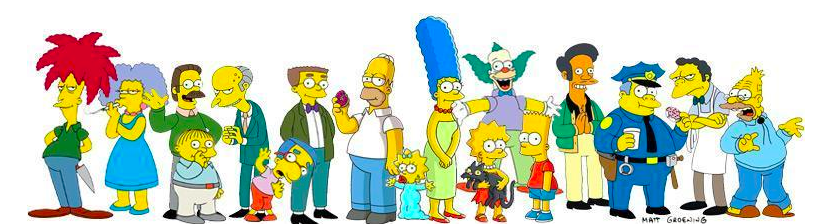

In [57]:
load_img('backupstuff/test_img_simpsons.jpg')

#### Goal

Identify Simpsons Characters with Artificial Neural Network. 

Data resouce: https://www.kaggle.com/alexattia/the-simpsons-characters-dataset

#### Setup & Clean up 

The dataset contains approximately 20000 images from the Simpsons. Since the number of images for each of the top 20 characters is not evenly distributed, we choose the top 10 characters with the most images. To ensure that our dataset is clean, we manually checked the training set to make sure the images are labeled correctly, and that each image only shows the specific character specified. The remaining characters are identified as others 

#### Convolutional Neural Networks

Created multiple CNN to generate the most efficiently model to identify Bart, Homer, Marge, Lisa, Principal Skinner, Moe, Milhouse, Krusty,  Burns, and Others 

#### Transfer Learning 

Utalized a pre-trained SSD Mobile Net for object detection. We annotated individual frames of Bart Simpsons in training set, and trained the SSD architecture using these images to recognize Bart in a video. We ran the trained model on each frame of the video clip, and re-complied the video with the object detection model built in. 

resource: https://www.youtube.com/watch?v=COlbP62-B-U&amp;vl=en




# Model Structure - No Image Augmentation

np.random.seed(123)

model_1 = models.Sequential()

model_1.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu',input_shape=(128 ,128,  3)))

model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(layers.BatchNormalization())

model_1.add(layers.Dropout(.2))

model_1.add(layers.Conv2D(32, (4, 4), padding = 'same', activation='relu'))

model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(layers.BatchNormalization())

model_1.add(layers.Dropout(.2))

model_1.add(layers.Conv2D(86, (3, 3), activation='relu', padding = 'same'))

model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(layers.BatchNormalization())

model_1.add(layers.Dropout(.2))

model_1.add(layers.Conv2D(86, (3, 3), activation='relu', padding = 'same'))

model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(layers.BatchNormalization())

model_1.add(layers.Dropout(.2))

model_1.add(layers.Flatten())

model_1.add(layers.Dense(256, activation='relu')) 

model_1.add(layers.Dropout(.2))

model_1.add(layers.Dense(11, activation='softmax'))

model_1.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])

In [16]:
# create model
np.random.seed(123)
model_1 = models.Sequential()
model_1.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu',input_shape=(128 ,128,  3)))

model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Dropout(.2))

model_1.add(layers.Conv2D(32, (4, 4), padding = 'same', activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Dropout(.2))

model_1.add(layers.Conv2D(86, (3, 3), activation='relu', padding = 'same'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Dropout(.2))

model_1.add(layers.Conv2D(86, (3, 3), activation='relu', padding = 'same'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Dropout(.2))

model_1.add(layers.Flatten())
model_1.add(layers.Dense(256, activation='relu')) 
model_1.add(layers.Dropout(.2))
model_1.add(layers.Dense(11, activation='softmax'))
#load weight
model_1.load_weights("model_1.h5")

## Validation Set Confusion Matrix - No Image Augmentation 

In [84]:
model_1.evaluate_generator(val_generator)

[0.29990965441653605, 0.9138062548128182]

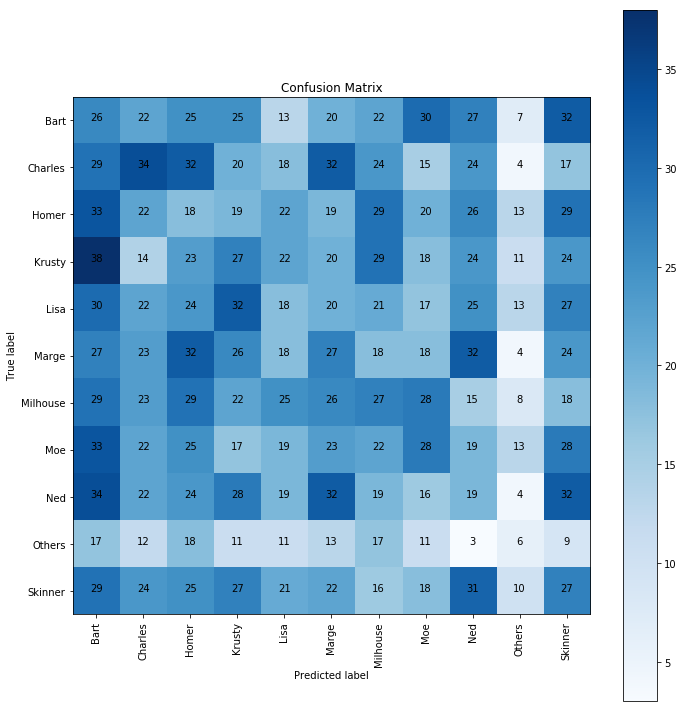

Classification Report
             precision    recall  f1-score   support

       Bart       0.08      0.10      0.09       249
    Charles       0.14      0.14      0.14       249
      Homer       0.07      0.07      0.07       250
     Krusty       0.11      0.11      0.11       250
       Lisa       0.09      0.07      0.08       249
      Marge       0.11      0.11      0.11       249
   Milhouse       0.11      0.11      0.11       250
        Moe       0.13      0.11      0.12       249
        Ned       0.08      0.08      0.08       249
     Others       0.06      0.05      0.05       128
    Skinner       0.10      0.11      0.10       250

avg / total       0.10      0.10      0.10      2622



In [86]:
plt.figure(figsize = (10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
character_classes=sorted(['Bart','Homer', 'Marge', 'Lisa', 'Moe', 'Ned', 'Krusty','Skinner', 'Charles', 'Milhouse', 'Others'])
tick_marks = np.arange(len(character_classes))
plt.xticks(tick_marks, character_classes, rotation=90)
plt.yticks(tick_marks, character_classes)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print('Classification Report')
cnf_matrix=classification_report(val_generator.classes, val_pred, target_names=character_classes)
print (cnf_matrix)


# Test Set Confusion Matrix  - No Image Augmentation

[1.477099666210136, 0.6151515157535823]
Confusion Matrix
[[ 4  4  5  8  2  4  6  3  5  1  8]
 [ 4  2  8  5  3  7  0  3  3  9  4]
 [ 7  5  8  2  3  3  2  4  1 10  5]
 [ 4  4 12  1  5  3  4  2  4  6  5]
 [ 6  4  6  3  2  2  2  1  7 10  7]
 [ 8  5  8  4  4  4  3  2  2  5  5]
 [ 5  9  6  2  1  5  2  3  4  8  4]
 [ 2  8  7  6  2  2  4  3  4  7  5]
 [ 5  6  5  6  4  1  3  3  4  7  5]
 [65 59 87 28 34 28 24 30 36 74 29]
 [ 7  3 12  2  3  1  4  0  8  7  3]]


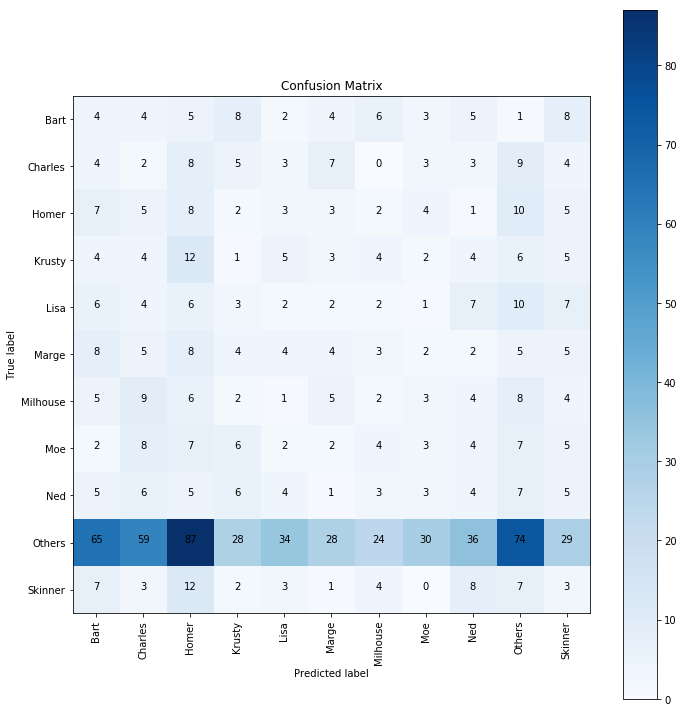

Classification Report
             precision    recall  f1-score   support

       Bart       0.03      0.08      0.05        50
    Charles       0.02      0.04      0.03        48
      Homer       0.05      0.16      0.07        50
     Krusty       0.01      0.02      0.02        50
       Lisa       0.03      0.04      0.04        50
      Marge       0.07      0.08      0.07        50
   Milhouse       0.04      0.04      0.04        49
        Moe       0.06      0.06      0.06        50
        Ned       0.05      0.08      0.06        49
     Others       0.51      0.15      0.23       494
    Skinner       0.04      0.06      0.05        50

avg / total       0.28      0.11      0.14       990



In [91]:
print(model_1.evaluate_generator(test_generator))
test_pred = model_1.predict_generator(test_generator)
test_pred = np.argmax(test_pred, axis=1)
print('Confusion Matrix')
cm =confusion_matrix(test_generator.classes, test_pred)
print(cm)
plt.figure(figsize = (10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
character_classes=sorted(['Bart','Homer', 'Marge', 'Lisa', 'Moe', 'Ned', 'Krusty','Skinner', 'Charles', 'Milhouse', 'Others'])
tick_marks = np.arange(len(character_classes))
plt.xticks(tick_marks, character_classes, rotation=90)
plt.yticks(tick_marks, character_classes)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print('Classification Report')
cnf_matrix=classification_report(test_generator.classes, test_pred, target_names=character_classes)
print (cnf_matrix)

In [145]:
test_image = load_img(image_name, target_size=(128, 128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)


In [150]:
#set up train generator 
train_datagen= ImageDataGenerator(rescale=1./255, 
     rotation_range=20,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.3,
     zoom_range=0.2,
     horizontal_flip = True)

# get all the data in the directory split/train (13286 images), and reshape them
train_generator = train_datagen.flow_from_directory(
        train_folder, 
        target_size=(128, 128), batch_size=32, class_mode='categorical')

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(128, 128), batch_size = 32, class_mode='categorical')

#set up 
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(128, 128), 
        batch_size = 32, 
        class_mode='categorical') 

Found 13286 images belonging to 11 classes.
Found 2622 images belonging to 11 classes.
Found 990 images belonging to 11 classes.


## Model # 2  with Image Augmentation


model_2 = models.Sequential()

model_2.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu',input_shape=(128 ,128,  3)))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.BatchNormalization())

model_2.add(Dropout(.3))

model_2.add(layers.Conv2D(32, (4, 4), padding = 'same', activation='relu'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.BatchNormalization())

model_2.add(Dropout(.3))

model_2.add(layers.Conv2D(86, (3, 3), activation='relu', padding = 'same'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.BatchNormalization())

model_2.add(Dropout(.3))

model_2.add(layers.Conv2D(86, (3, 3), activation='relu', padding = 'same'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.BatchNormalization())

model_2.add(Dropout(.3))

model_2.add(layers.Flatten())

model_2.add(layers.Dense(256, activation='relu')) 

model_2.add(Dropout(.5))

model_2.add(layers.Dense(11, activation='softmax'))

model_2.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])

In [149]:
np.random.seed(123)
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu',input_shape=(128 ,128,  3)))

model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.BatchNormalization())
model_2.add(Dropout(.3))

model_2.add(layers.Conv2D(32, (4, 4), padding = 'same', activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.BatchNormalization())
model_2.add(Dropout(.3))

model_2.add(layers.Conv2D(86, (3, 3), activation='relu', padding = 'same'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.BatchNormalization())
model_2.add(Dropout(.3))

model_2.add(layers.Conv2D(86, (3, 3), activation='relu', padding = 'same'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.BatchNormalization())
model_2.add(Dropout(.3))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(256, activation='relu')) 
model_2.add(Dropout(.5))
model_2.add(layers.Dense(11, activation='softmax'))

model_2.load_weights("model_2.h5")

model_2.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])


Confusion Matrix
[[ 1  2 12  3  2  6  1  4  4  8  7]
 [ 6  2  9  4  1  2  2  4  4  9  5]
 [ 5  2  6  2  5  5  3  8  2  9  3]
 [ 5  1 11  2  4  2  3  6  1 11  4]
 [ 5  1  9  3  4  5  3  1  2 11  6]
 [ 6  2  8  2  4  4  2  6  3 11  2]
 [ 8  1  9  1  2  3  2  7  3  9  4]
 [ 6  5  3  5  4  5  3  3  5  9  2]
 [ 7  4  8  2  7  2  4  1  2  7  5]
 [43 37 85 17 46 19 29 56 32 97 33]
 [ 4  0  6  3  3  5  2  8  5  9  5]]


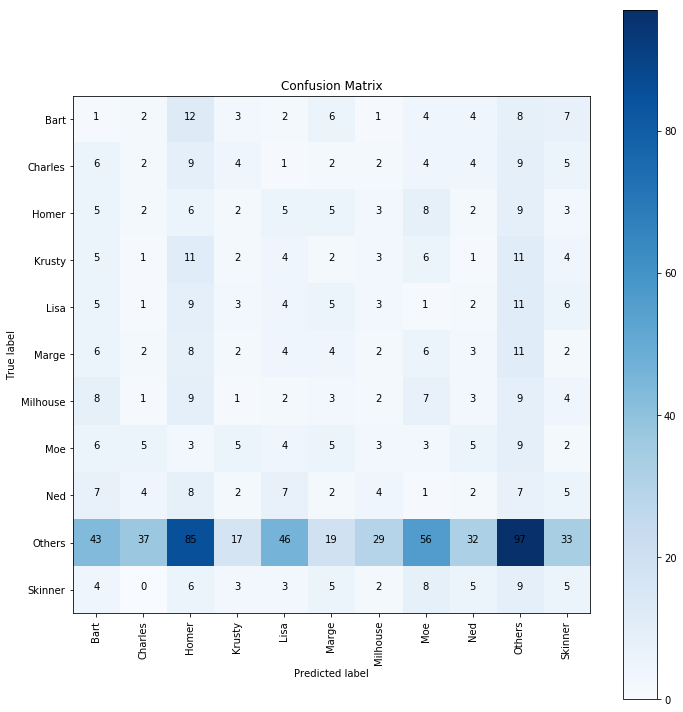

Classification Report
             precision    recall  f1-score   support

       Bart       0.01      0.02      0.01        50
    Charles       0.04      0.04      0.04        48
      Homer       0.04      0.12      0.06        50
     Krusty       0.05      0.04      0.04        50
       Lisa       0.05      0.08      0.06        50
      Marge       0.07      0.08      0.07        50
   Milhouse       0.04      0.04      0.04        49
        Moe       0.03      0.06      0.04        50
        Ned       0.03      0.04      0.04        49
     Others       0.51      0.20      0.28       494
    Skinner       0.07      0.10      0.08        50

avg / total       0.28      0.13      0.17       990



In [153]:
test_pred = model_2.predict_generator(test_generator)
test_pred = np.argmax(test_pred, axis=1)
print('Confusion Matrix')
cm =confusion_matrix(test_generator.classes, test_pred)
print(cm)
plt.figure(figsize = (10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
character_classes=sorted(['Bart','Homer', 'Marge', 'Lisa', 'Moe', 'Ned', 'Krusty','Skinner', 'Charles', 'Milhouse', 'Others'])
tick_marks = np.arange(len(character_classes))
plt.xticks(tick_marks, character_classes, rotation=90)
plt.yticks(tick_marks, character_classes)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print('Classification Report')
cnf_matrix=classification_report(test_generator.classes, test_pred, target_names=character_classes)
print (cnf_matrix)


## Model # 3 with Image Augmentation 

np.random.seed(123)

model_2 = models.Sequential()

model_2.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu',input_shape=(64 ,64,  3)))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.BatchNormalization())

model_2.add(Dropout(.4))

model_2.add(layers.Conv2D(32, (4, 4), padding = 'same', activation='relu'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.BatchNormalization())

model_2.add(Dropout(.4))

model_2.add(layers.Conv2D(86, (3, 3), activation='relu', padding = 'same'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.BatchNormalization())

model_2.add(Dropout(.4))

model_2.add(layers.Conv2D(86, (3, 3), activation='relu', padding = 'same'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.BatchNormalization())

model_2.add(Dropout(.4))

model_2.add(layers.Flatten())

model_2.add(layers.Dense(256, activation='relu')) 

model_2.add(Dropout(.5))

model_2.add(layers.Dense(11, activation='softmax'))

model_2.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])

In [184]:
#set up train generator 
train_datagen= ImageDataGenerator(rescale=1./255, 
     rotation_range=20,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.3,
     zoom_range=0.2,
     horizontal_flip = True)

# get all the data in the directory split/train (13286 images), and reshape them
train_generator = train_datagen.flow_from_directory(
        train_folder, 
        target_size=(64, 64), batch_size=32, class_mode='categorical')

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64), batch_size = 32, class_mode='categorical')

#set up 
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), 
        batch_size = 32, 
        class_mode='categorical') 

np.random.seed(123)
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu',input_shape=(64 ,64,  3)))

model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.BatchNormalization())
model_2.add(Dropout(.4))

model_2.add(layers.Conv2D(32, (4, 4), padding = 'same', activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.BatchNormalization())
model_2.add(Dropout(.4))

model_2.add(layers.Conv2D(86, (3, 3), activation='relu', padding = 'same'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.BatchNormalization())
model_2.add(Dropout(.4))

model_2.add(layers.Conv2D(86, (3, 3), activation='relu', padding = 'same'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.BatchNormalization())
model_2.add(Dropout(.4))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(256, activation='relu')) 
model_2.add(Dropout(.5))
model_2.add(layers.Dense(11, activation='softmax'))

model_2.load_weights("model_3.h5")

model_2.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])

Found 13286 images belonging to 11 classes.
Found 2622 images belonging to 11 classes.
Found 990 images belonging to 11 classes.


Confusion Matrix
[[  4   6   4   1   8   3   4   3   2  10   5]
 [  1   3   9   4   4   2   5   4   3   9   4]
 [  4   8   6   3   4   3   2   3   3   8   6]
 [  4   6   3   4   9   1   2   4   1  15   1]
 [  2  13   2   2   1   4   5   8   1  10   2]
 [  2   4   6   1   4   4   3   6   3  14   3]
 [  0   4   6   3   5   1   5   4   4  12   5]
 [  3   2   7   6   3   3   4   7   1  12   2]
 [  1   9   4   6   7   3   1   4   3   7   4]
 [ 24  55  60  21  47  24  23  43  27 135  35]
 [  4   5   6   2   6   2   4   6   4   7   4]]


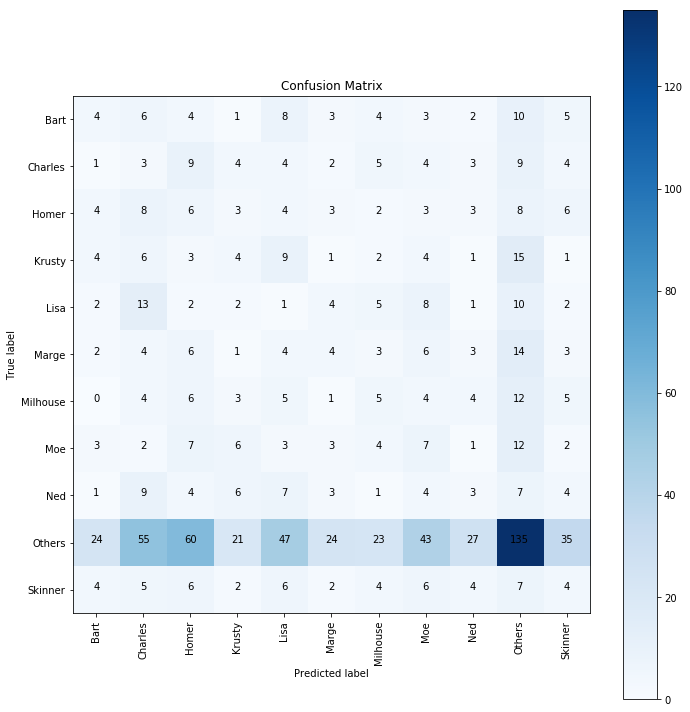

Classification Report
             precision    recall  f1-score   support

       Bart       0.08      0.08      0.08        50
    Charles       0.03      0.06      0.04        48
      Homer       0.05      0.12      0.07        50
     Krusty       0.08      0.08      0.08        50
       Lisa       0.01      0.02      0.01        50
      Marge       0.08      0.08      0.08        50
   Milhouse       0.09      0.10      0.09        49
        Moe       0.08      0.14      0.10        50
        Ned       0.06      0.06      0.06        49
     Others       0.56      0.27      0.37       494
    Skinner       0.06      0.08      0.07        50

avg / total       0.31      0.18      0.22       990



In [185]:
test_pred = model_2.predict_generator(test_generator)
test_pred = np.argmax(test_pred, axis=1)
print('Confusion Matrix')
cm =confusion_matrix(test_generator.classes, test_pred)
print(cm)
plt.figure(figsize = (10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
character_classes=sorted(['Bart','Homer', 'Marge', 'Lisa', 'Moe', 'Ned', 'Krusty','Skinner', 'Charles', 'Milhouse', 'Others'])
tick_marks = np.arange(len(character_classes))
plt.xticks(tick_marks, character_classes, rotation=90)
plt.yticks(tick_marks, character_classes)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print('Classification Report')
cnf_matrix=classification_report(test_generator.classes, test_pred, target_names=character_classes)
print (cnf_matrix)


## Model 4

np.random.seed(123)

model_2 = models.Sequential()

model_2.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu',input_shape=(64 ,64,  3)))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.BatchNormalization())

model_2.add(Dropout(.25))

model_2.add(layers.Conv2D(32, (4, 4), padding = 'same', activation='relu'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.BatchNormalization())

model_2.add(Dropout(.25))

model_2.add(layers.Conv2D(64, (4, 4), padding = 'same', activation='relu'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.BatchNormalization())

model_2.add(Dropout(.25))

model_2.add(layers.Conv2D(64, (4, 4), padding = 'same', activation='relu'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.BatchNormalization())

model_2.add(Dropout(.25))

model_2.add(layers.Conv2D(86, (3, 3), activation='relu', padding = 'same'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.BatchNormalization())

model_2.add(Dropout(.25))

model_2.add(layers.Conv2D(86, (3, 3), activation='relu', padding = 'same'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.BatchNormalization())

model_2.add(Dropout(.25))

model_2.add(layers.Flatten())

model_2.add(layers.Dense(256, activation='relu')) 

model_2.add(Dropout(.5))

model_2.add(layers.Dense(11, activation='softmax'))


model_2.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])


In [15]:
#set up train generator 
train_datagen= ImageDataGenerator(rescale=1./255, 
     rotation_range=20,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.3,
     zoom_range=0.2,
     horizontal_flip = True)

# get all the data in the directory split/train (13286 images), and reshape them
train_generator = train_datagen.flow_from_directory(
        train_folder, 
        target_size=(64, 64), batch_size=32, class_mode='categorical')

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64), batch_size = 32, class_mode='categorical')

#set up 
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), 
        batch_size = 32, 
        class_mode='categorical') 

np.random.seed(123)
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu',input_shape=(64 ,64,  3)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.BatchNormalization())
model_2.add(Dropout(.25))

model_2.add(layers.Conv2D(32, (4, 4), padding = 'same', activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.BatchNormalization())
model_2.add(Dropout(.25))

model_2.add(layers.Conv2D(64, (4, 4), padding = 'same', activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.BatchNormalization())
model_2.add(Dropout(.25))

model_2.add(layers.Conv2D(64, (4, 4), padding = 'same', activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.BatchNormalization())
model_2.add(Dropout(.25))

model_2.add(layers.Conv2D(86, (3, 3), activation='relu', padding = 'same'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.BatchNormalization())
model_2.add(Dropout(.25))

model_2.add(layers.Conv2D(86, (3, 3), activation='relu', padding = 'same'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.BatchNormalization())
model_2.add(Dropout(.25))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(256, activation='relu')) 
model_2.add(Dropout(.5))
model_2.add(layers.Dense(11, activation='softmax'))


model_2.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])

model_2.load_weights("model_3.h5")



Found 12269 images belonging to 11 classes.
Found 2622 images belonging to 11 classes.
Found 990 images belonging to 11 classes.


[1.3318193199658634, 0.6313131319151984]
Confusion Matrix
[[ 4  0  7  6  6  6  3  3  4  6  5]
 [ 3  2  3  4  6  1  1  4  4 11  9]
 [ 6  4  7  2  7  1  2  3  1 11  6]
 [ 3  4  6  4  5  3  4  4  5  6  6]
 [ 4  2  3  3  3  3  2  2  6 12 10]
 [ 4  1  3  6  5  3  5  4  5  5  9]
 [ 6  0  9  4  4  3  3  4  4  9  3]
 [ 7  5  8  1  4  2  4  5  1 10  3]
 [ 2  5  6  1  7  5  1  3  1  8 10]
 [34 35 58 43 47 26 29 31 39 86 66]
 [ 4  5  4  1  4  3  1  3  8 11  6]]


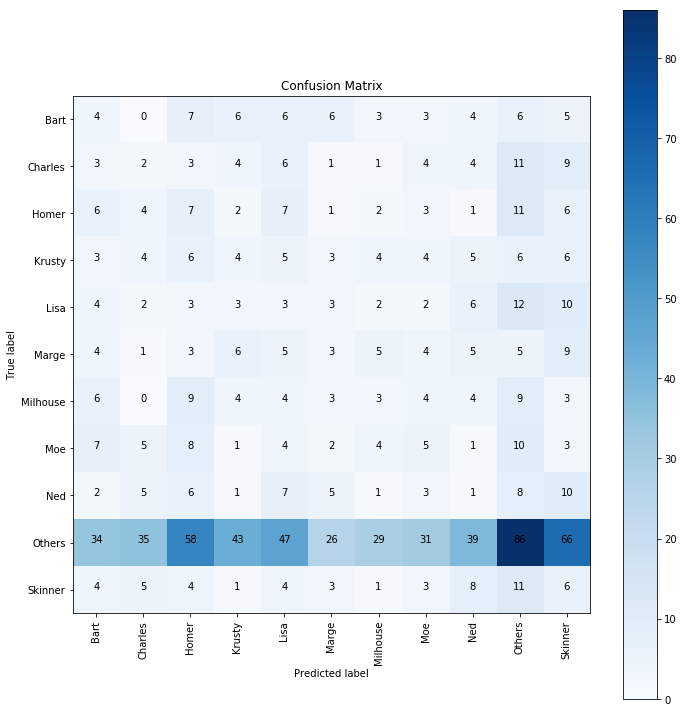

Classification Report
             precision    recall  f1-score   support

       Bart       0.05      0.08      0.06        50
    Charles       0.03      0.04      0.04        48
      Homer       0.06      0.14      0.09        50
     Krusty       0.05      0.08      0.06        50
       Lisa       0.03      0.06      0.04        50
      Marge       0.05      0.06      0.06        50
   Milhouse       0.05      0.06      0.06        49
        Moe       0.08      0.10      0.09        50
        Ned       0.01      0.02      0.02        49
     Others       0.49      0.17      0.26       494
    Skinner       0.05      0.12      0.07        50

avg / total       0.27      0.13      0.16       990



In [400]:
print(model_2.evaluate_generator(test_generator))
test_pred = model_2.predict_generator(test_generator)
test_pred = np.argmax(test_pred, axis=1)
print('Confusion Matrix')
cm =confusion_matrix(test_generator.classes, test_pred)
print(cm)
plt.figure(figsize = (10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
character_classes=sorted(['Bart','Homer', 'Marge', 'Lisa', 'Moe', 'Ned', 'Krusty','Skinner', 'Charles', 'Milhouse', 'Others'])
tick_marks = np.arange(len(character_classes))
plt.xticks(tick_marks, character_classes, rotation=90)
plt.yticks(tick_marks, character_classes)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print('Classification Report')
cnf_matrix=classification_report(test_generator.classes, test_pred, target_names=character_classes)

print (cnf_matrix)


## Model 5
np.random.seed(123)

model_2 = models.Sequential()

model_2.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu',input_shape=(64 ,64,  3)))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.BatchNormalization())

model_2.add(layers.Dropout(.25))

model_2.add(layers.Conv2D(32, (4, 4), padding = 'same', activation='relu'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.BatchNormalization())

model_2.add(layers.Dropout(.25))

model_2.add(layers.Conv2D(64, (4, 4), padding = 'same', activation='relu'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.BatchNormalization())

model_2.add(layers.Dropout(.25))

model_2.add(layers.Conv2D(64, (4, 4), padding = 'same', activation='relu'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.BatchNormalization())

model_2.add(layers.Dropout(.25))

model_2.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.BatchNormalization())

model_2.add(layers.Dropout(.25))

model_2.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.BatchNormalization())

model_2.add(layers.Dropout(.25))

model_2.add(layers.Flatten())

model_2.add(layers.Dense(256, activation='relu')) 

model_2.add(layers.Dropout(.5))

model_2.add(layers.Dense(11, activation='softmax'))

model_2.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])

[1.2353912618425158, 0.6646464644056378]
Confusion Matrix
[[ 2  1  5  5  2  6  3  5  7 10  4]
 [ 2  5  6  4  4  1  1  6  4  8  7]
 [ 8  3  5  2  4  1  1  5  3 12  6]
 [ 3  5  6  2  3  4  5  7  5  6  4]
 [ 3  3  3  1  1  3  1  4  7 16  8]
 [ 2  4  4  5  4  3  4  4  6  8  6]
 [ 4  3 10  4  4  3  2  2  6  7  4]
 [ 6  6  4  0  3  2  3  6  2 13  5]
 [ 5  5  5  0  4  4  2  9  1  8  6]
 [26 43 63 32 28 24 28 57 50 95 48]
 [ 5  4  5  1  1  3  1  6  6 12  6]]


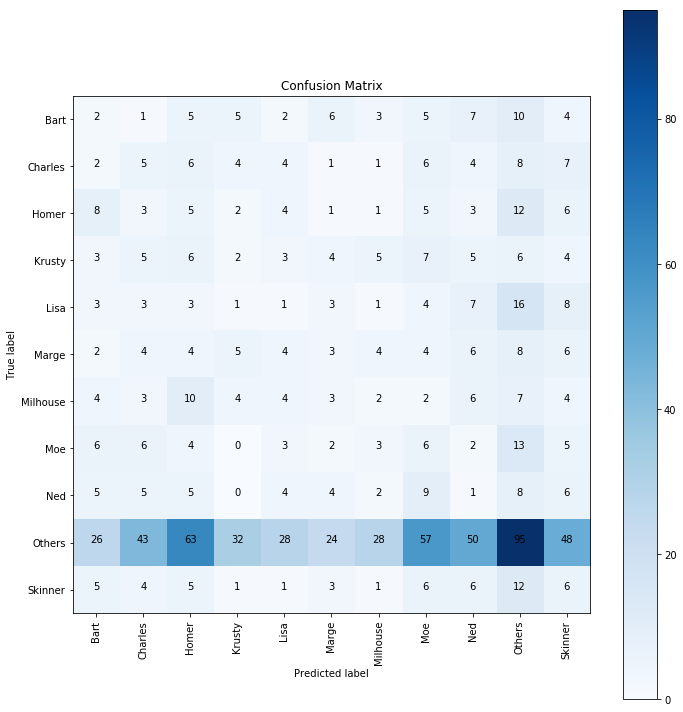

Classification Report
             precision    recall  f1-score   support

       Bart       0.03      0.04      0.03        50
    Charles       0.06      0.10      0.08        48
      Homer       0.04      0.10      0.06        50
     Krusty       0.04      0.04      0.04        50
       Lisa       0.02      0.02      0.02        50
      Marge       0.06      0.06      0.06        50
   Milhouse       0.04      0.04      0.04        49
        Moe       0.05      0.12      0.07        50
        Ned       0.01      0.02      0.01        49
     Others       0.49      0.19      0.28       494
    Skinner       0.06      0.12      0.08        50

avg / total       0.26      0.13      0.16       990



In [22]:
np.random.seed(123)
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu',input_shape=(64 ,64,  3)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Dropout(.25))

model_2.add(layers.Conv2D(32, (4, 4), padding = 'same', activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Dropout(.25))

model_2.add(layers.Conv2D(64, (4, 4), padding = 'same', activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Dropout(.25))

model_2.add(layers.Conv2D(64, (4, 4), padding = 'same', activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Dropout(.25))

model_2.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Dropout(.25))

model_2.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Dropout(.25))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(256, activation='relu')) 
model_2.add(layers.Dropout(.5))
model_2.add(layers.Dense(11, activation='softmax'))

model_2.load_weights("model_4.h5")


model_2.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])
print(model_2.evaluate_generator(test_generator))
test_pred = model_2.predict_generator(test_generator)
test_pred = np.argmax(test_pred, axis=1)
print('Confusion Matrix')
cm =confusion_matrix(test_generator.classes, test_pred)
print(cm)
plt.figure(figsize = (10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
character_classes=sorted(['Bart','Homer', 'Marge', 'Lisa', 'Moe', 'Ned', 'Krusty','Skinner', 'Charles', 'Milhouse', 'Others'])
tick_marks = np.arange(len(character_classes))
plt.xticks(tick_marks, character_classes, rotation=90)
plt.yticks(tick_marks, character_classes)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print('Classification Report')
cnf_matrix=classification_report(test_generator.classes, test_pred, target_names=character_classes)

print (cnf_matrix)


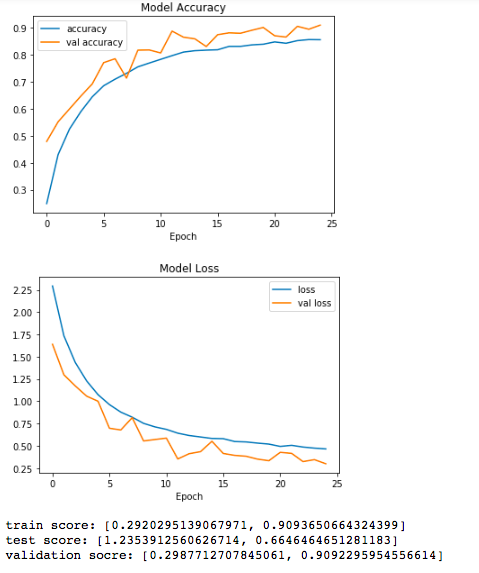

In [30]:
load_img('finalmodel.png')

## Character Recognition Test 

In [23]:
#define paths 
test_images = [file for file in os.listdir('simpson_test_set/') if file.endswith('.jpg')]
test_images_paths=['simpson_test_set/'+ i for i in test_images]
# prediction function 
def predict_img(path): 
    """define classes"""
    character_classes=sorted(['Bart','Homer', 'Marge', 'Lisa', 'Moe', 'Ned', 'Krusty','Skinner', 'Charles', 'Milhouse', 'Others'])
    """show image input"""
    plt.imshow(load_img(path))
    """make prediction"""
    img= load_img(path, target_size=(64, 64))
    to_array=img_to_array(img) /255
    tensor = np.expand_dims(to_array, axis=0)
    pred=model_2.predict_classes(tensor)[0]
    print('Prediction:', character_classes[pred])
    """graph prediction prob"""
    pred_proba=model_2.predict_proba(tensor)[0]
    df=pd.DataFrame(data=pred_proba ,index=character_classes, columns=['probability'])
    display(df)
    return None 
#dropdown bar
def show(x): 
    return predict_img(x)
display.line_width: 2000000

interact(show, x=test_images_paths)

interactive(children=(Dropdown(description='x', options=('simpson_test_set/principal_skinner_34.jpg', 'simpson…

<function __main__.show(x)>

Prediction: Bart


probability
Bart      9.877607e-01
Charles   5.834155e-05
Homer     6.318425e-05
Krusty    7.276284e-05
Lisa      1.200322e-02
Marge     9.503042e-07
Milhouse  1.857971e-05
Moe       1.348805e-06
Ned       7.698804e-06
Others    1.310690e-05
Skinner   1.729487e-07

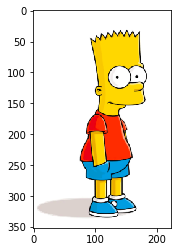

In [24]:
predict_img('bart.jpg')

Prediction: Marge


probability
Bart      1.873598e-05
Charles   5.374437e-07
Homer     3.327471e-06
Krusty    4.647376e-08
Lisa      1.513136e-05
Marge     9.999604e-01
Milhouse  7.238464e-07
Moe       4.373632e-08
Ned       2.805069e-07
Others    6.084148e-07
Skinner   1.367905e-08

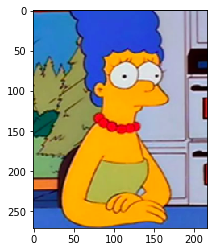

In [26]:
predict_img('marge_2.jpg')

# Transfer Learning for Image Recognition 

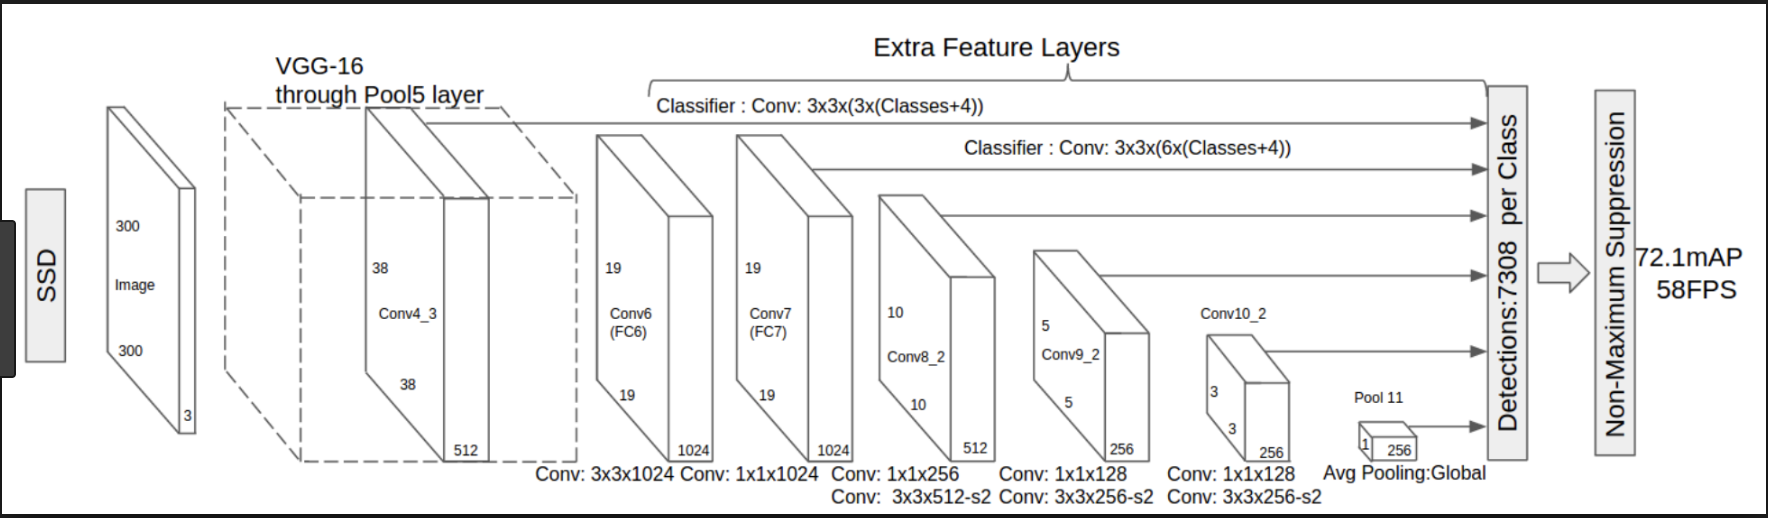

In [41]:
load_img('transferlearning.png')

In [47]:
from IPython.display import HTML
HTML('<img src="1_cMR5W-JeOc8l-n1pLXRVnw.gif">')

## Annotation Process 

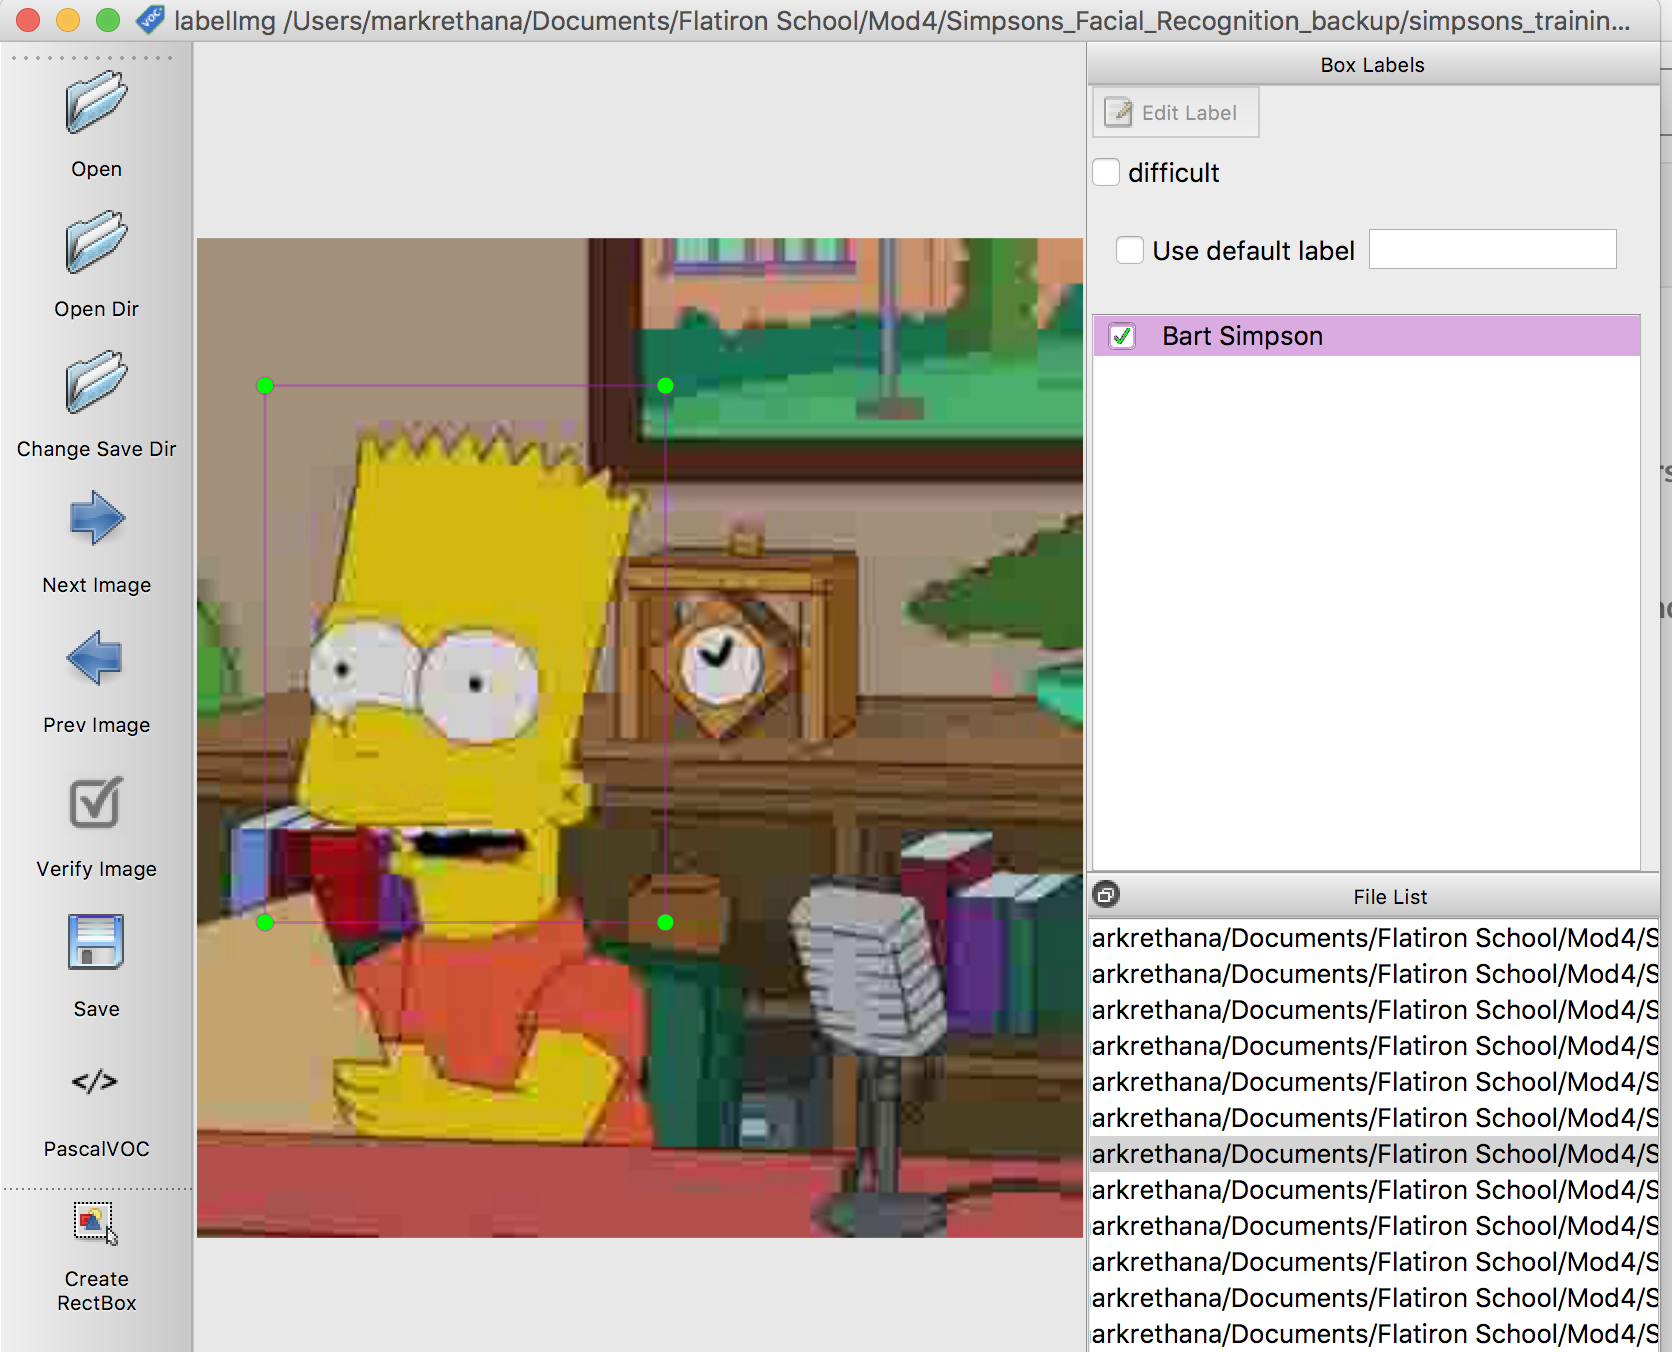

In [53]:
load_img('annotation2.png')

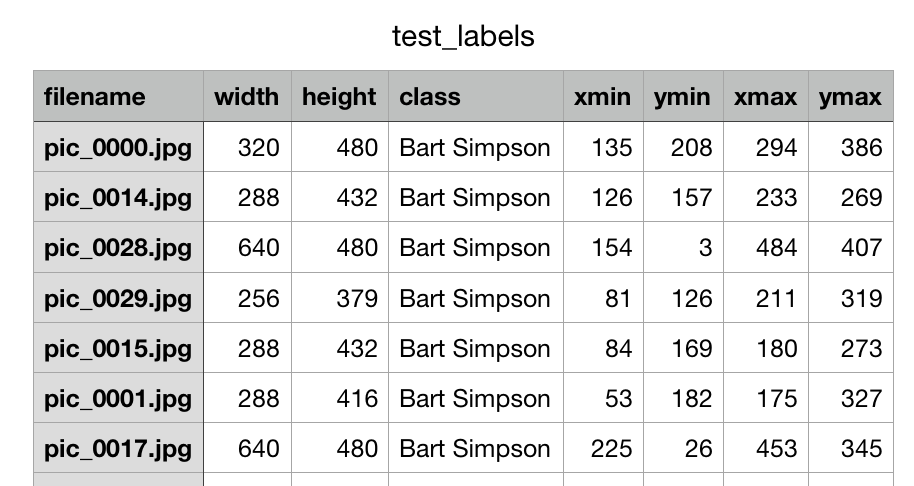

In [50]:
load_img('annotation1.png')

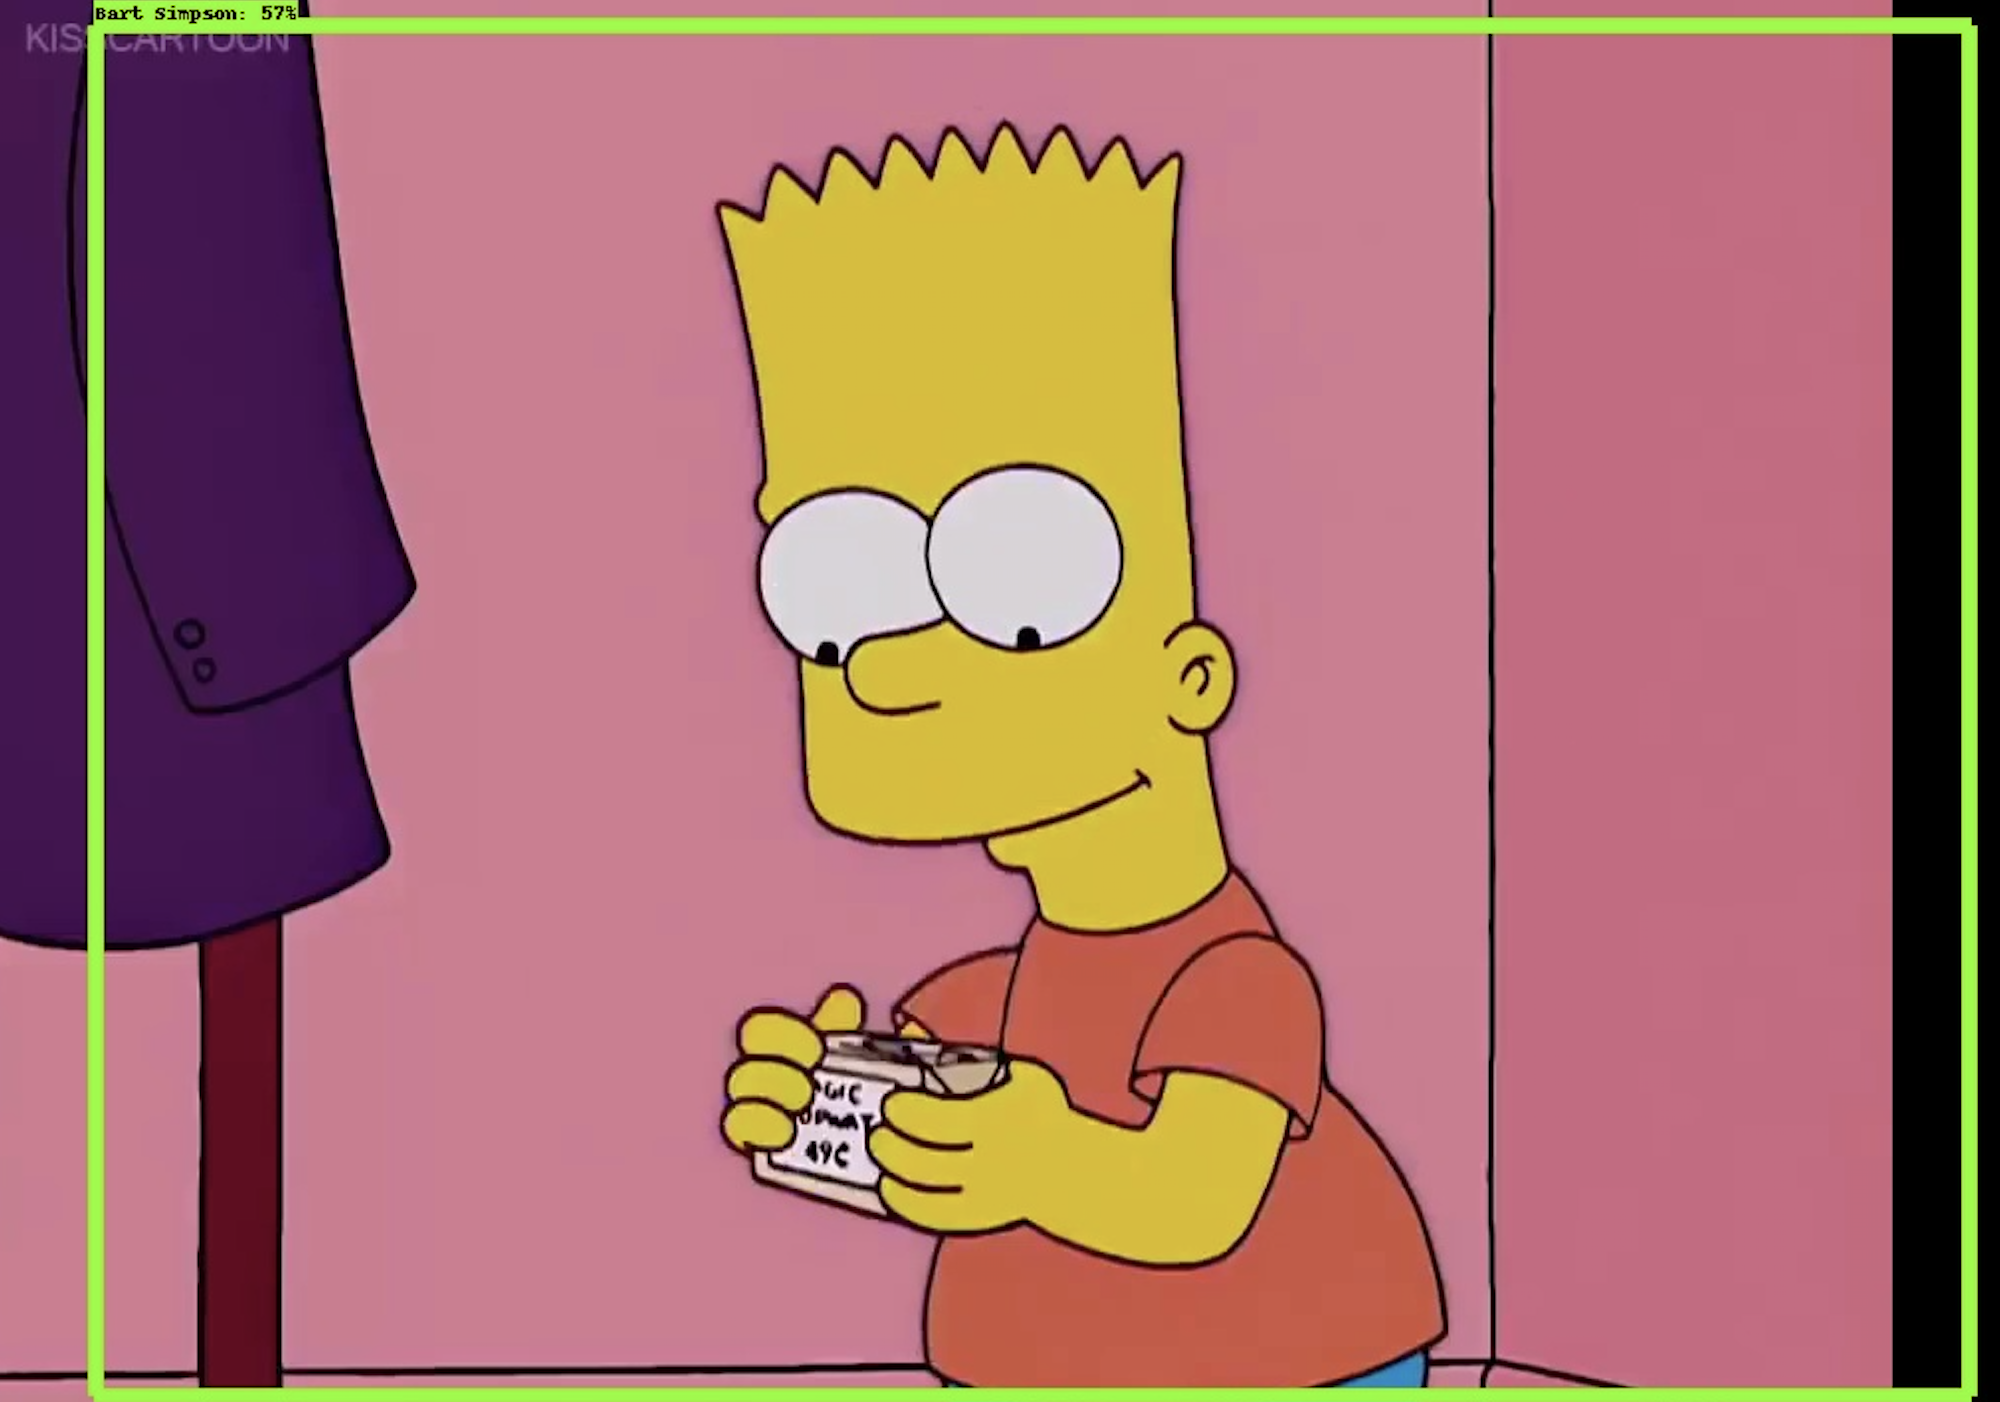

In [42]:
load_img('screenshot1.png')

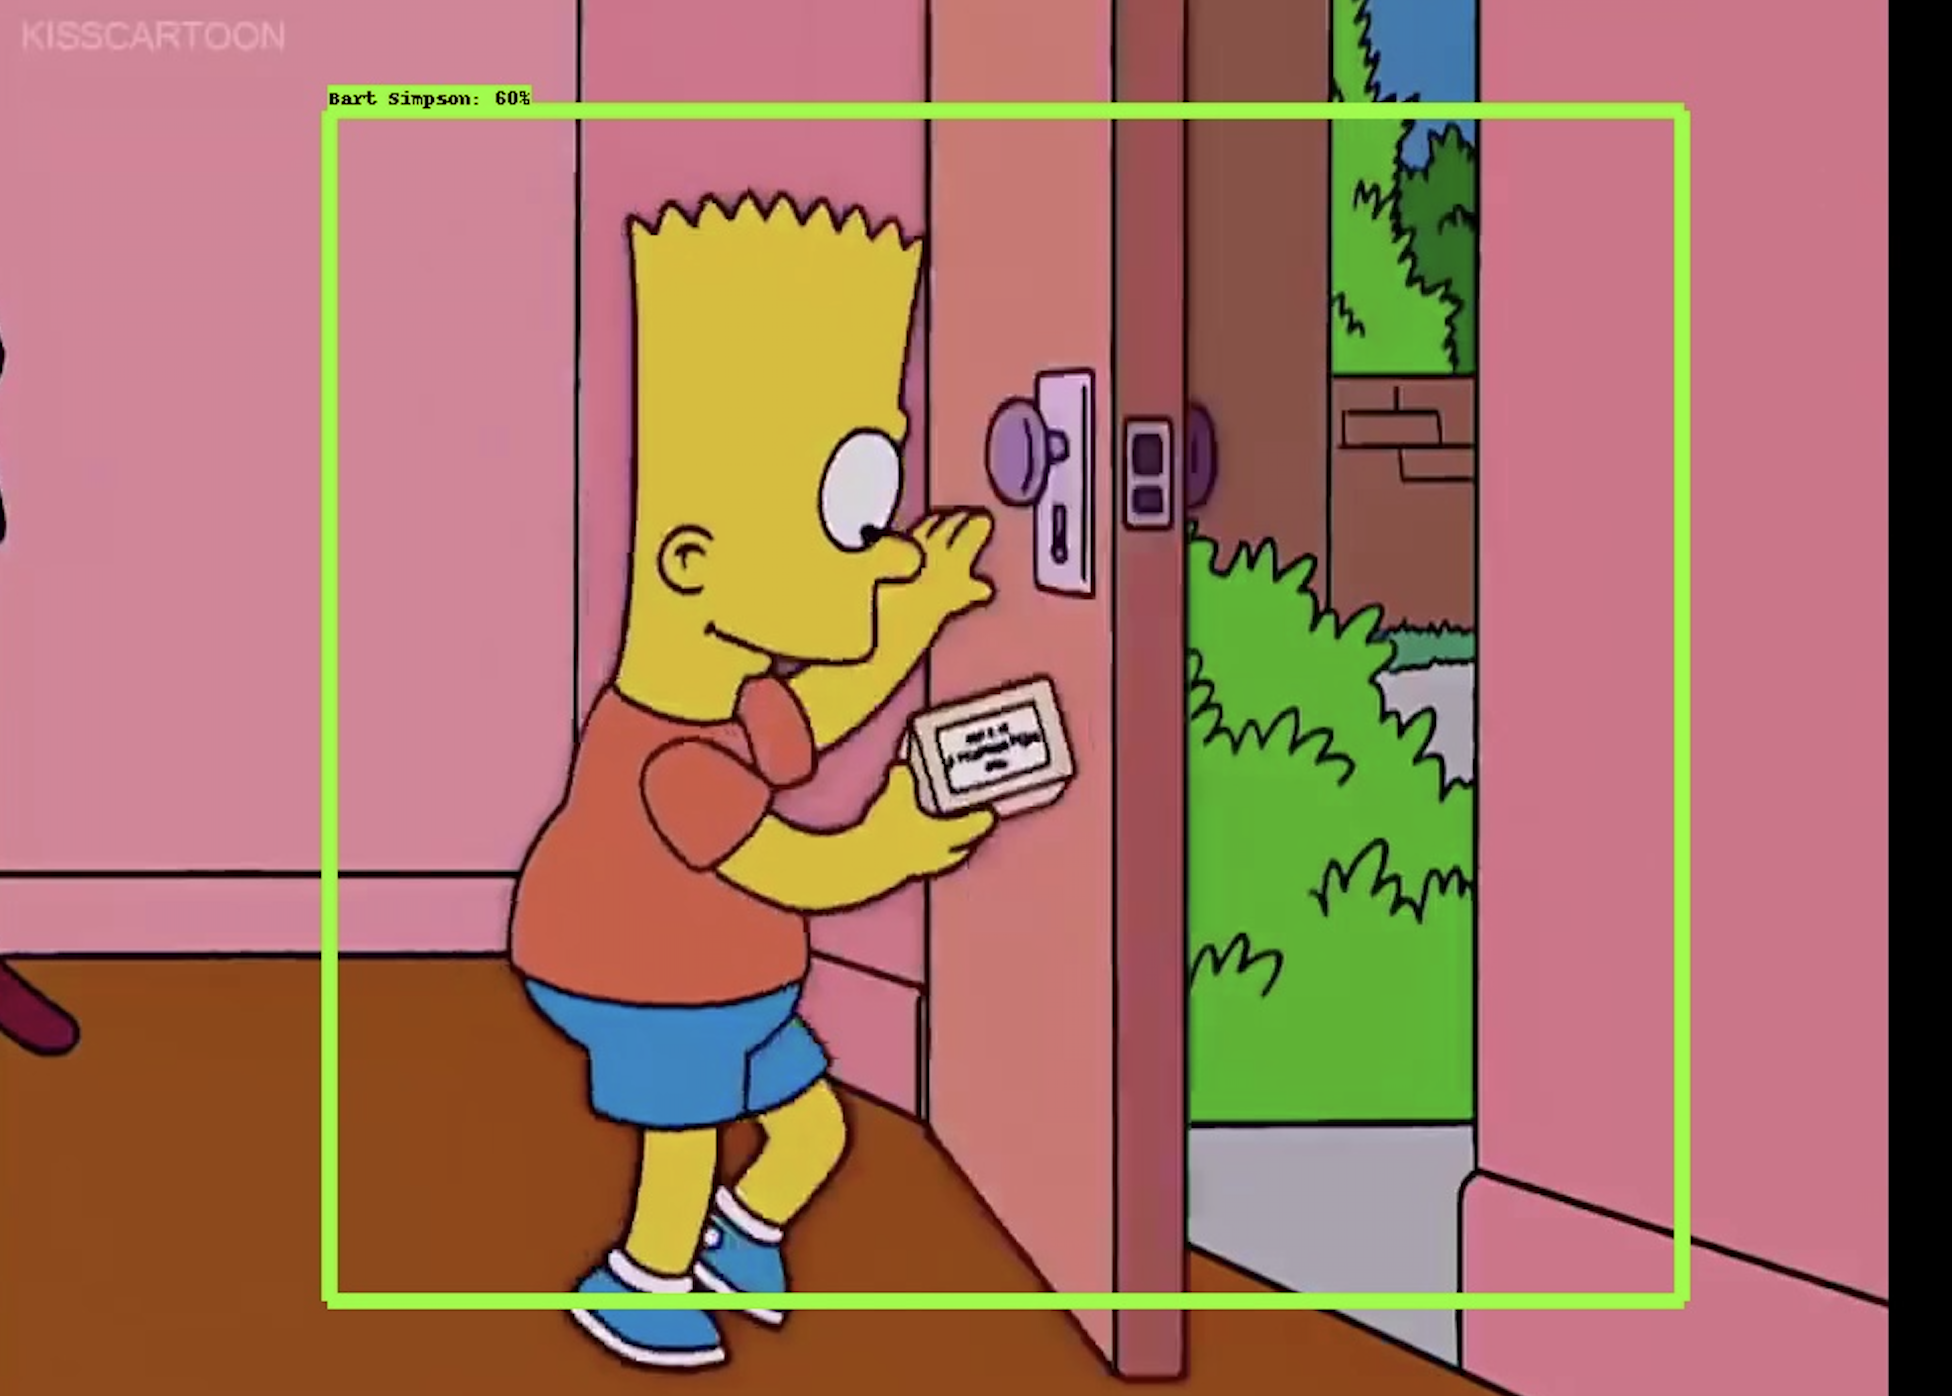

In [43]:
load_img('screenshot2.png')

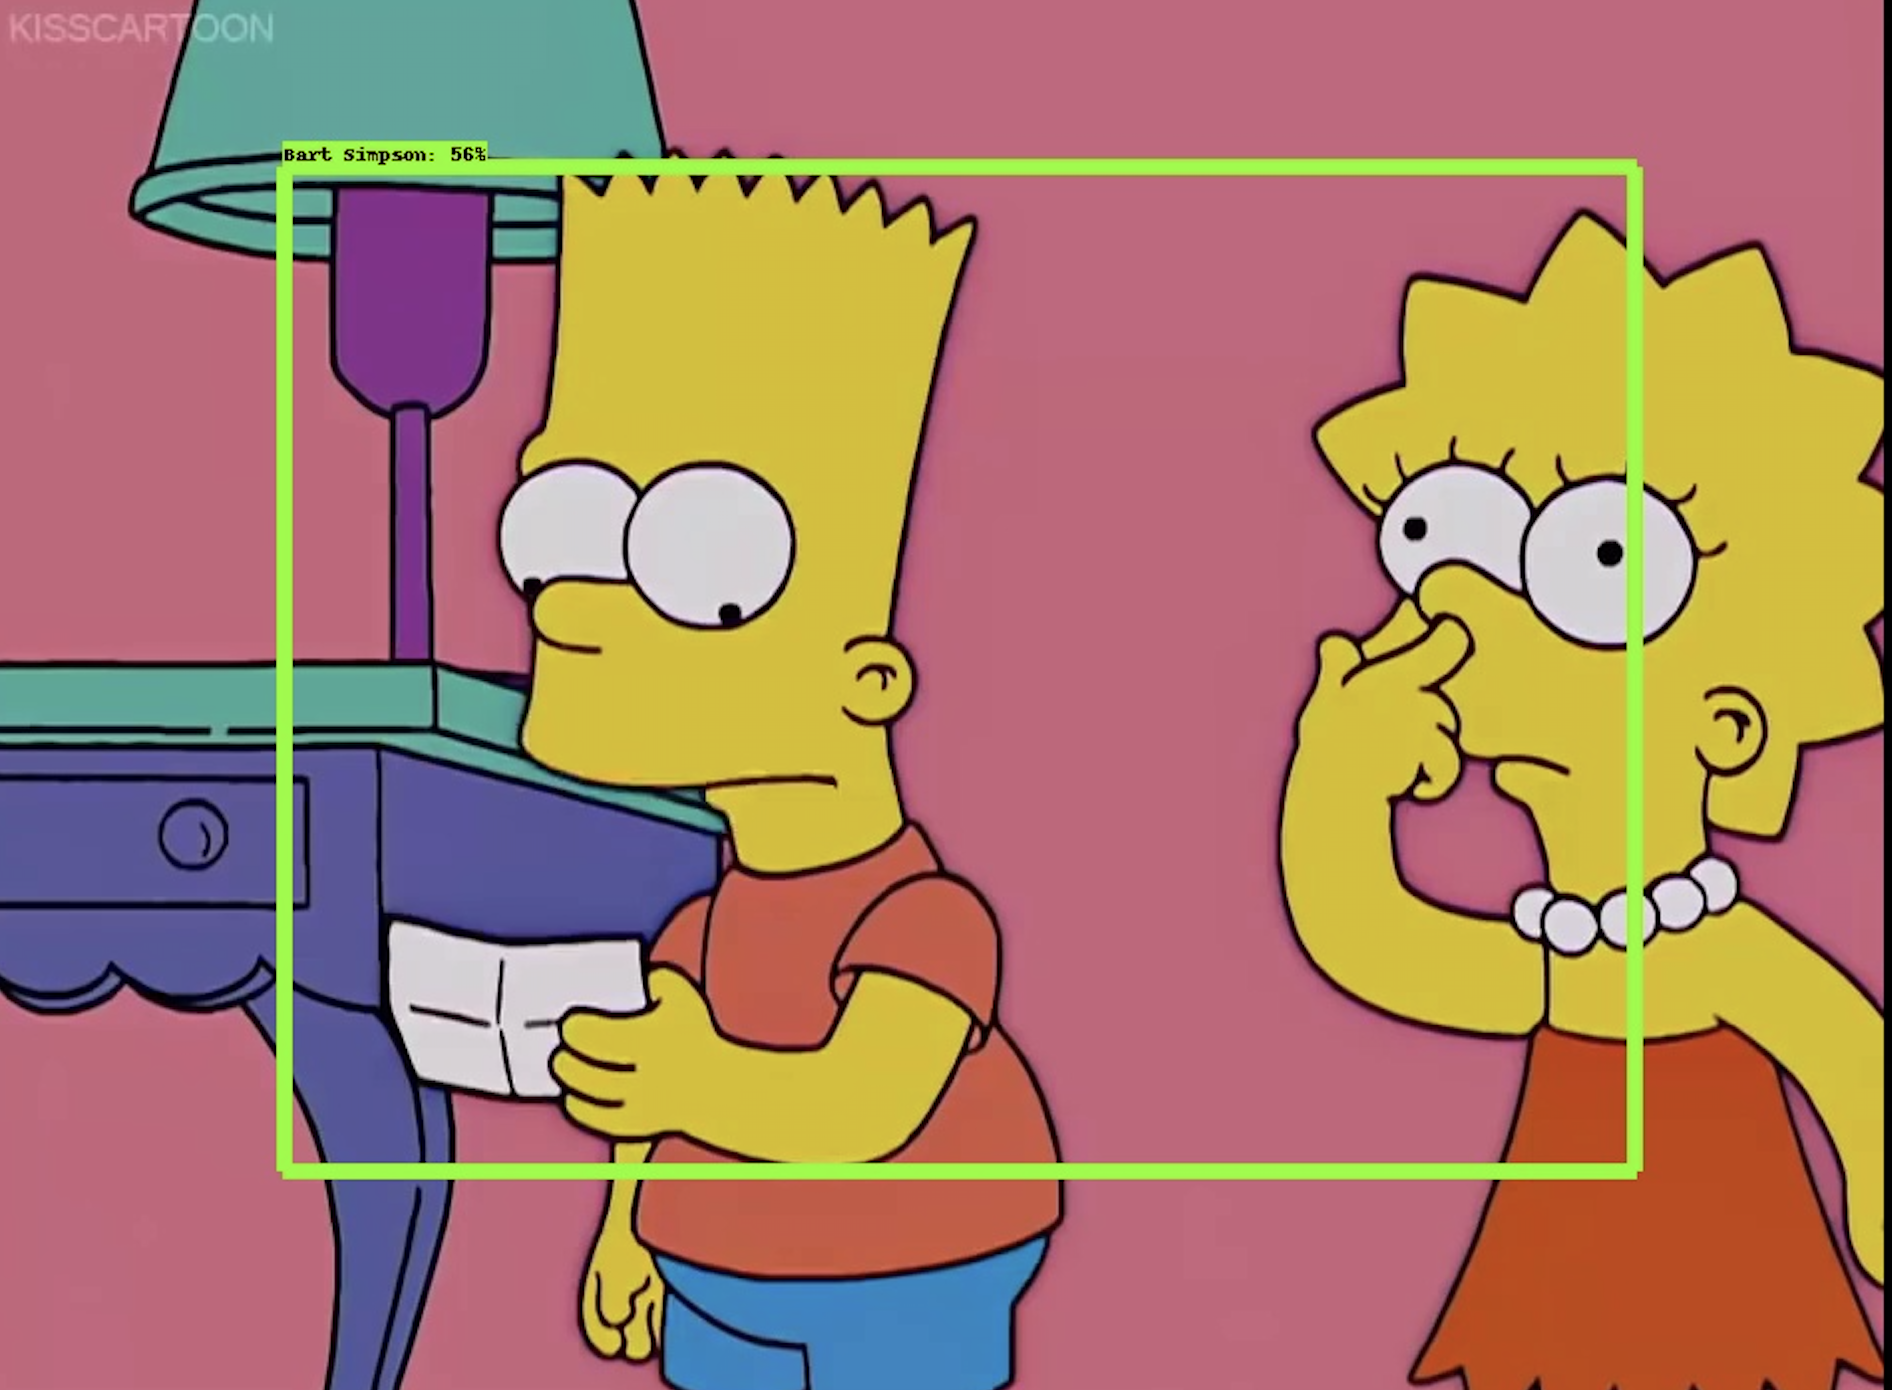

In [44]:
load_img('screenshot3.png')

# Let's see the video !!!